In [1]:
import json
import numpy as np
import pandas as pd
import arviz as az
from cmdstanpy import CmdStanModel

In [2]:
idata_softmax = az.from_json('sampling_results/simplex/softmax.json')
idata_stan = az.from_json('sampling_results/simplex/stan.json')
idata_softmax_augmented = az.from_json('sampling_results/simplex/softmax-augmented.json')
idata_stickbreaking = az.from_json('sampling_results/simplex/stickbreaking.json')

def get_lp_rmse(idata):
    lp = idata.sample_stats.n_steps.mean(axis=0).cumsum()
    pred = np.divide(idata.posterior.x.mean(axis=0).sel(x_dim_0=1).cumsum(), np.arange(1,1001))
    rmse = np.divide(np.cumsum(np.square(np.asarray([0.1])-pred)), np.arange(1,1000+1))
    return lp, rmse

In [4]:
lp_softmax, rmse_softmax = get_lp_rmse(idata_softmax)
lp_stan, rmse_stan = get_lp_rmse(idata_stan)
lp_softmax_augmented, rmse_softmax_augmented = get_lp_rmse(idata_softmax_augmented)
lp_stickbreaking, rmse_stickbreaking = get_lp_rmse(idata_stickbreaking)

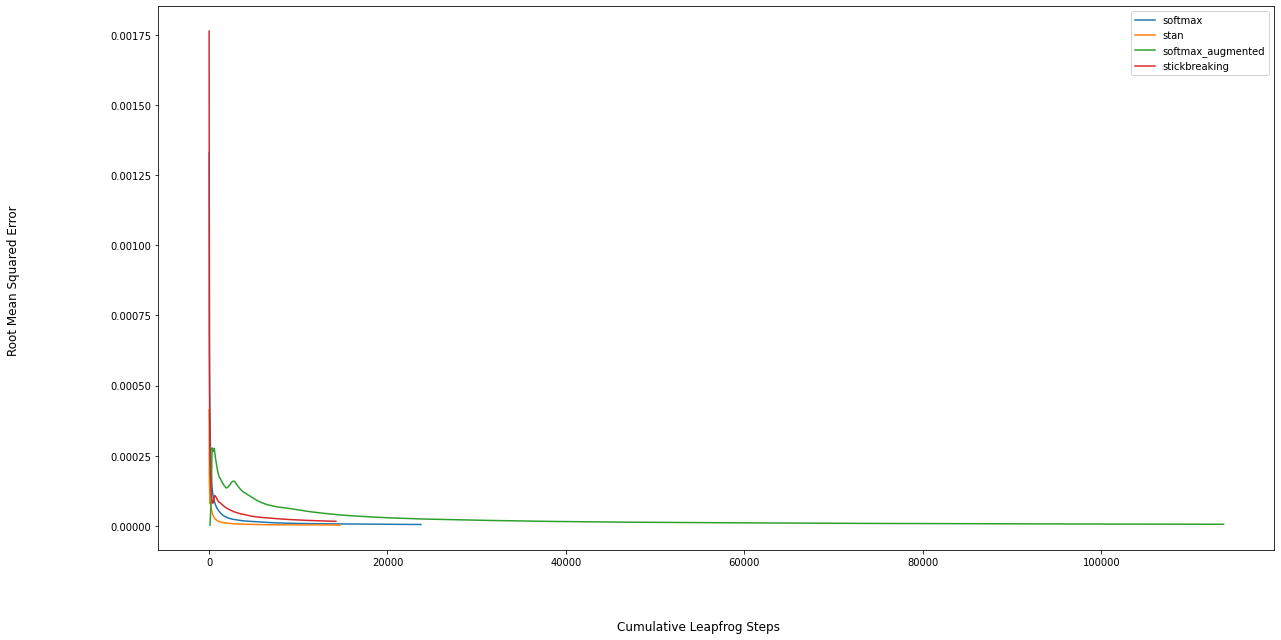

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

fig, axes = plt.subplots()

fig.supxlabel('Cumulative Leapfrog Steps')
fig.supylabel('Root Mean Squared Error')

axes.plot(lp_softmax, rmse_softmax, label="softmax")
axes.plot(lp_stan, rmse_stan, label="stan")
axes.plot(lp_softmax_augmented, rmse_softmax_augmented, label="softmax_augmented")
axes.plot(lp_stickbreaking, rmse_stickbreaking, label="stickbreaking")
axes.legend(["softmax", "stan", "softmax_augmented", "stickbreaking"])